In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#시계열 데이터 생성

np.random.seed(0)
n= 100 #데이터 포인트 수
ma_params = [0.4, -0.2] #이동평균 계수
residuals = np.random.normal(0, 1, n)

#MA(2) 모델 생성

data = [0, 0] #초기값 설정
for i in range(2, n):
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2] * residuals[i])
    
    #데이터프레임 생성
    df = pd.DataFrame({
        'Value' : data
    })
print(df)

       Value
0   0.000000
1   0.000000
2  -0.185246
3   0.212153
4   0.530787
..       ...
95  0.004533
96  0.281881
97 -0.248170
98  0.714082
99 -0.092815

[100 rows x 1 columns]


In [5]:
# 데이터프레임 생성

df=pd.DataFrame({
    'Value' : data
})
print(df)

       Value
0   0.000000
1   0.000000
2  -0.185246
3   0.212153
4   0.530787
..       ...
95  0.004533
96  0.281881
97 -0.248170
98  0.714082
99 -0.092815

[100 rows x 1 columns]


In [7]:
#MA(2) 모델 적합
model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

#MA(2)
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -55.524
Date:                Thu, 01 Jun 2023   AIC                            119.048
Time:                        09:37:38   BIC                            129.469
Sample:                             0   HQIC                           123.266
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.048     -0.245      0.806      -0.106       0.082
ma.L1         -0.0416      0.079     -0.523      0.601      -0.197       0.114
ma.L2          0.1600      0.095      1.685      0.0

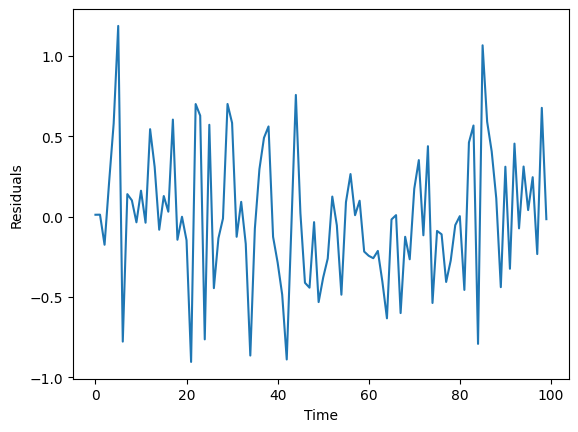

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -55.524
Date:                Thu, 01 Jun 2023   AIC                            119.048
Time:                        09:38:55   BIC                            129.469
Sample:                             0   HQIC                           123.266
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.048     -0.245      0.806      -0.106       0.082
ma.L1         -0.0416      0.079     -0.523      0.601      -0.197       0.114
ma.L2          0.1600      0.095      1.685      0.0

In [10]:
#잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()
#MA(2) 모델 정보 출력
print(results.summary())